In [ ]:
- title: Занятие 4
- author: Kononov Dmitrij
- date: 2025-02-27
- slug: s2_lab04
- ipynb_url: download/s2_lab04.ipynb

# Занятие 4: Графы — Обход в глубину и его применения, шарниры и мосты.

## Цель: Освоить на практике применение обхода графа в глубину.

# Повторить
1. Алгоритм поиска (обхода) в глубину
2. Поиск шарниров и мостов

## Алгоритм обхода в глубину
**Алгоритм обхода в глубину** (англ. `depth-first search`, `DFS`) позволяет построить обход ориентированного или неориентированного графа, при котором посещаются все вершины, доступные из начальной вершины.

Результатом алгоритма **обхода в глубину** является некоторый маршрут, следуя которому можно обойти последовательно все вершины графа, доступные из начальной вершины. 

Если граф ориентированный, то обход в глубину строит дерево путей из начальной вершины во все доступные из нее.

Обход в глубину можно представить себе следующим образом:
1.	Пойти в какую-нибудь смежную вершину, не посещенную ранее.
2.	Запустить из этой вершины алгоритм обхода в глубину.
3.	Вернуться в начальную вершину.
4.	Повторить пункты 1-3 для всех не посещенных ранее смежных вершин.

Для реализации алгоритма понадобится отмечать, в каких вершинах был исследователь, а в каких — нет. Пометку можно делать в списке `visited`, где `visited[i] == True` для посещенных вершин, и `visited[i] == False` для непосещенных. Пометка «о посещении вершиных» ставится при заходе в эту вершину.

Алгоритм обхода в глубину можно оформить в виде рекурсивной функции `dfs`, где `s` — номер вершины, из которой запускается обход:

``` python
def dfs(G, s):
    visited[s] = True
    for v in G[s]:
        if not visited[v]:
            dfs(G, v)

```

В этом алгоритме `G[s]` хранит множество вершин смежных с `s`. Для запуска алгоритма, например, для вершины с номером `s` необходимо вызвать функцию `dfs(G, s)`. После этого вызова все вершины, доступные из `s`, будут отмечены в глобальном списке `visited` (определенном в основной программе).

**Задание 1** — Для графа, изображенного на рисунке ниже, реализуйте алгоритм обхода в глубину. Отобразите на экране состояния стека вызовов и распечатайте итоговый маршрут

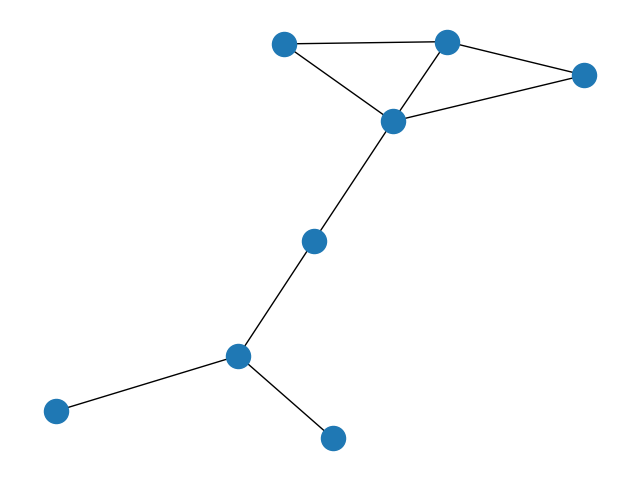

## Шарниры графа
**Шарниром** графа называют вершину, удаление которой (и всех инцидентных ей рёбер) отсоединяет связный компонент графа (материал далее основан на материале книги Скиена С.С. Алгоритмы. Руководство по разработке.). 

**Задание 2** — Для графа из задания 1 определите вершины, являющиеся шарнирами.

**Задание 3** — Для графа из задания 1 нарисуйте дерево обхода в глубину (на основании результатов, полученных при выполнении задания 1). Отобразите древесные и обратные ветви. Анализируя полученный рисунок подумайте, какие узлы графа не могут быть шарнирами и почему?

Определить какие узлы являются шарнирами графа можно на основании анализа определённой информации, собираемой в процессе обхода графа в глубину. Но прежде рассмотрим граф (слева) и его дерево обхода в глубину (справа) на рисунке ниже. Желтым цветом отмечены шарниры графа. Чёрными стрелками на дереве обхода изображены древесные рёбра, а синими пунктирными - обратные.

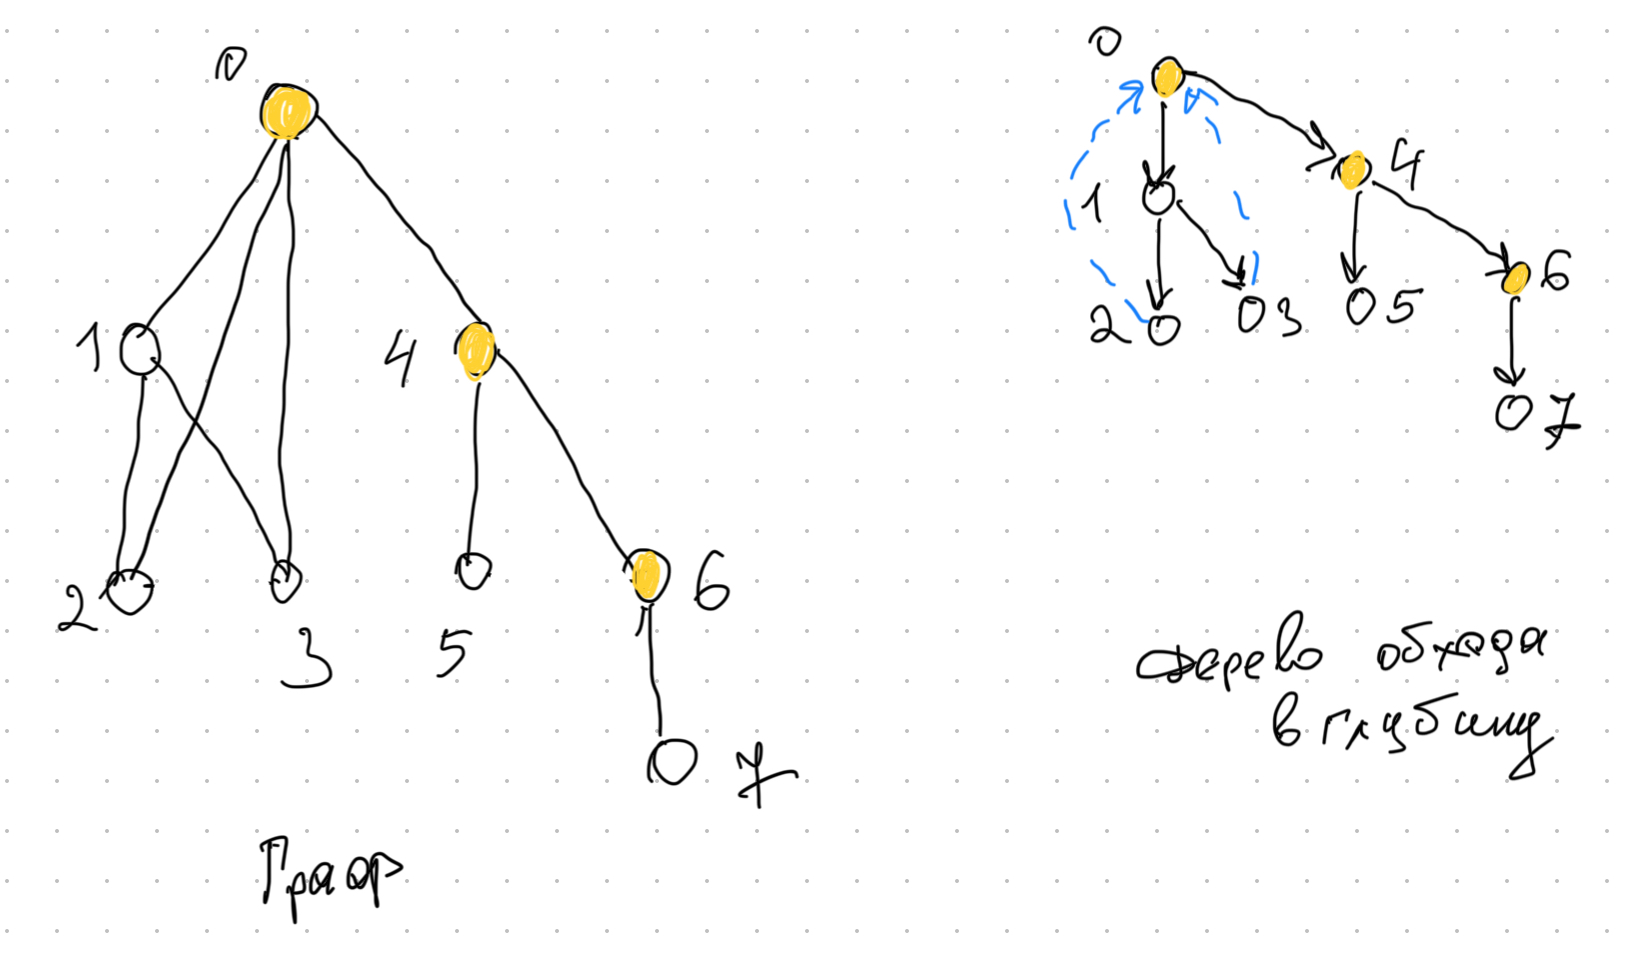

На дереве обхода вершина 0 является корнем дерева и предком всех вершин дерева (для вершин 1 и 4 - родителем). Вершина 1 - родителем вершин 2 и 3, а вершина 4 родителем вершин 5 и 6 и предком вершины 7. При этом вершины 4, 6 и 7 - потомки вершины 0 и т.п. Обратное ребро является таковым, если идёт от потомка к более раннему предку, чем родитель - например от вершины 3 к 0. Таким образом, чтобы различать обратные рёбра нам необходимо при обходе дерева сохранять информацию относительно времени открытия (исследования) конкретной вершины.  Для этого добавим в нашу программу глобальную переменную time и сформируем с ее помощью массивы, сохраняющие информацию о входе (entry_time) и выходе (exit_time) из вершины. Также в глобальном массиве parents сохраним информацию о предках каждой вершины:
``` python
def dfs(G, s):
    global time
    visited[s] = True
    time = time + 1
    entry_time[s] = time

    for v in G[s]:
        if not visited[v]:
            parents[v] = s
            dfs(G, v)
    
    exit_time[s] = time
    time = time + 1
    return

```

**Задание 4** — Для графа из задания 1 проанализируйте значения массивов entry_time, exit_time и parents. Разница между exit_time[v] - entry_time[v], поделённая пополам, равна числу потомков вершины v. Так ли это в Вашем случае?

Обратимся к дереву обхода на рисунке выше: чем оббратное ребро 2 - 0 отличается от древесного 2 - 1? Тем, что оно ведет не к родителю, а к одному из предков. Вокруг вершины 1 возникает обходной путь от его потомка к одному из предков (не обязательно родителю) - вершина 1 не может быть шарниром.
Для отслеживания данного факта (наличие обхода данной вершины) определим глобальный массив reachable_ancestor. Значение reachable_ancestor[v] содержит информацию о том какой предок вершины v доступен для её потомков. Изначально значение reachable_ancestor[v] равно v, а затем изменяется при обработке ребра до рекурсивного вызова dfs()  и после (в функции processed_edge()):
 ``` python
 def edge_classification(x, y):
    if parents[y] == x:# tree
        return 0
    if visited[y] and not processed[y]: # back
        return 1

def processed_edge(x, y):
    edge_type = edge_classification(x, y) # определим тип вершины
    
    if edge_type == 0: # tree
        tree_out_degree[x] = tree_out_degree[x] + 1
        
    if edge_type == 1 and parents[x] != y: # back
        if entry_time[y] < entry_time[reachable_ancestor[x]]:
            reachable_ancestor[x] = y
    return

def dfs(G, s):
    global time
    visited[s] = True
    route.append(s)
    time = time + 1
    entry_time[s] = time

    reachable_ancestor[s] = s

    for v in G[s]:
        # Пробежимся по смежным с s вершинам
        if not visited[v]:
            parents[v] = s
            dfs(G, v)
            processed_edge(s, v)
        else:
            if not processed[v] and parents[s] != v:
                processed_edge(s, v)            
    
    exit_time[s] = time
    time = time + 1
    processed[s] = True
    return                

```
В листинге выше помимо уже упомянутых глобальных массивов введен массив дополнительнго статуса вершины (processed[v] вершина v обработана), а также функция edge_classification(x, y) для определения типа ребра (древесное или обратное) и глобальный массив степененей исходящих ребер для каждой вершины: tree_out_degree.

**Задание 5** — Измените код вашей программы определения шарниров в соответствии с примером выше, выведете на экран значения каждого глобального массива: проанализируйте их содержимое и соотнесите с деревом обхода в глубину. Сделайте выводы.

Наконец добавим код и вызов функции processed_vertex_late(v), в которой происходит обработка информации при выходе из вершины v - именно в ней и происходит определение является ли вершина шарниром и какого типа (всего их три - корневой, родительский и мостовой). Причем шарнир может одновременно относиться к нескольким типам:
 ``` python
 def processed_vertex_late(v):
    if parents[v] == -1:
        if tree_out_degree[v] > 1:
            print(f'Корневой шарнир {v}')
        return
            
    root = (parents[v] == -1)

    if not root:
        if reachable_ancestor[v] == parents[v] and parents[parents[v]] != -1:
            print(f'Шарнир-родитель {parents[v]}')

        if reachable_ancestor[v] == v:           
            print(f'Мостовой шарнир {parents[v]}')
            if tree_out_degree[v] > 0: # вершина не лист?
                print(f'Мостовой шарнир {v}')

        time_v = entry_time[reachable_ancestor[v]]
        time_parent = entry_time[reachable_ancestor[parents[v]]]
        if time_v < time_parent:
            reachable_ancestor[parents[v]] = reachable_ancestor[v]
            
def dfs(G, s):
    global time
    visited[s] = True
    route.append(s)
    time = time + 1
    entry_time[s] = time

    reachable_ancestor[s] = s

    for v in G[s]:
        # Пробежимся по смежным с s вершинам
        if not visited[v]:
            parents[v] = s
            dfs(G, v)
            processed_edge(s, v)
        else:
            if not processed[v] and parents[s] != v:
                processed_edge(s, v)            
    
    processed_vertex_late(s)
    exit_time[s] = time
    time = time + 1
    processed[s] = True
    return                

```

**Задание 6** — Измените код вашей программы определения шарниров в соответствии с примером выше и определите шарниры графа из задания 1. Соотнесите полученные результаты с деревом обхода в глубину. Сделайте выводы.

Ребро, чьё удаление разъединяет граф (добавляет компоненты связности), называется **мостом**. Является ли мостом то или иное ребро можно определить путём его удаления и проверки графа на связность, а можно посредством обхода графа в глубину.
Ребро (v, w) является мостом, если оно древесное и если нет обратных рёбер, соединяющих вершину w (или какого-то из ее потомков) с вершиной v (или каким-то её предком). Удовлетворяет ли ребро этим условиям можно проверить, внеся изменения в код функции processed_vertex_late().  

**Задание 7** (дополнительное) — Измените код вашей программы и определите наличие мостов (с выводом соответствующих рёбер на экран) для графа из задания 1. Соотнесите полученные результаты с деревом обхода в глубину. Сделайте выводы.